In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import f
import statistics

In [9]:
df = pd.read_csv("food_impact_india.csv")

In [10]:
df.head()

,Person_ID,Age,Gender,Region,Diet_Type,Primary_Cuisine,Spice_Level,Daily_Calorie_Intake,Health_Impact,Common_Diseases,Exercise_Level,BMI,Food_Frequency,Sugar_Intake,Salt_Intake,Health_Score
0,1,56,Female,East,Vegetarian,Gujarati,High,2768,Positive,Diabetes,Sedentary,37.3,5,Low,High,30
1,2,69,Male,Central,Vegetarian,North Indian,Low,3005,Positive,Obesity,Moderate,38.4,3,Low,Moderate,95
2,3,46,Male,South,Vegetarian,Maharashtrian,Medium,3416,Positive,Diabetes,Sedentary,19.6,4,High,Low,86
3,4,32,Female,West,Vegan,North Indian,Medium,1572,Neutral,NaN,Moderate,32.5,5,Low,Low,81
4,5,60,Male,East,Non-Vegetarian,Gujarati,Medium,2539,Negative,Diabetes,Moderate,30.4,4,High,Moderate,37


In [12]:
df["Exercise_Level"].describe()

count         17686
unique            3
top       Sedentary
freq           8754
Name: Exercise_Level, dtype: object

In [22]:
# Sorting groups into Young Adults, Middle-Aged, Elderly (Minimum age is 18)
# Trends to examine:
# Gender vs. Calorie Intake
# Age vs Calorie Intake
# Calorie intake vs. BMI
# Exercise_Level vs. BMI
# Diet Type vs. BMI
df["Age"].describe()

def categorize(X):
    if X >= 60:
        return "Elderly"
    elif X >= 40:
        return "Middle"
    else:
        return "Young"

df["Age Category"] = df["Age"].apply(categorize)

In [17]:
df.head()

,Person_ID,Age,Gender,Region,Diet_Type,Primary_Cuisine,Spice_Level,Daily_Calorie_Intake,Health_Impact,Common_Diseases,Exercise_Level,BMI,Food_Frequency,Sugar_Intake,Salt_Intake,Health_Score,Age Category
0,1,56,Female,East,Vegetarian,Gujarati,High,2768,Positive,Diabetes,Sedentary,37.3,5,Low,High,30,Middle
1,2,69,Male,Central,Vegetarian,North Indian,Low,3005,Positive,Obesity,Moderate,38.4,3,Low,Moderate,95,Elderly
2,3,46,Male,South,Vegetarian,Maharashtrian,Medium,3416,Positive,Diabetes,Sedentary,19.6,4,High,Low,86,Middle
3,4,32,Female,West,Vegan,North Indian,Medium,1572,Neutral,NaN,Moderate,32.5,5,Low,Low,81,Young
4,5,60,Male,East,Non-Vegetarian,Gujarati,Medium,2539,Negative,Diabetes,Moderate,30.4,4,High,Moderate,37,Elderly


In [23]:
middle_aged = df[df["Age Category"] == "Middle"]
middle_aged["Daily_Calorie_Intake"].describe()

count    6783.000000
mean     2353.105853
std       662.478247
min      1200.000000
25%      1785.000000
50%      2359.000000
75%      2929.000000
max      3500.000000
Name: Daily_Calorie_Intake, dtype: float64

In [24]:
young_adults = df[df["Age Category"] == "Young"]
young_adults["Daily_Calorie_Intake"].describe()

count    7522.000000
mean     2361.608748
std       656.023077
min      1200.000000
25%      1797.000000
50%      2370.000000
75%      2925.000000
max      3500.000000
Name: Daily_Calorie_Intake, dtype: float64

In [25]:
elderly = df[df["Age Category"] == "Elderly"]
elderly["Daily_Calorie_Intake"].describe()

count    3381.000000
mean     2365.225969
std       662.440926
min      1200.000000
25%      1794.000000
50%      2371.000000
75%      2948.000000
max      3500.000000
Name: Daily_Calorie_Intake, dtype: float64

In [26]:
df[df["Daily_Calorie_Intake"] == 3500]

,Person_ID,Age,Gender,Region,Diet_Type,Primary_Cuisine,Spice_Level,Daily_Calorie_Intake,Health_Impact,Common_Diseases,Exercise_Level,BMI,Food_Frequency,Sugar_Intake,Salt_Intake,Health_Score,Age Category
2697,2698,64,Male,Central,Vegetarian,Maharashtrian,Low,3500,Neutral,Obesity,Active,34.0,2,Low,Moderate,39,Elderly
6470,6471,35,Female,North,Vegetarian,Gujarati,Medium,3500,Positive,NaN,Active,28.9,1,Moderate,Moderate,54,Young
12370,12371,26,Male,North,Vegetarian,Gujarati,High,3500,Positive,Hypertension,Sedentary,36.1,1,Moderate,Low,11,Young
13944,13945,50,Male,North,Non-Vegetarian,Bengali,Medium,3500,Negative,NaN,Moderate,24.2,6,Moderate,Moderate,3,Middle
17400,17401,56,Non-Binary,West,Non-Vegetarian,North Indian,Medium,3500,Positive,NaN,Sedentary,31.4,5,Moderate,Moderate,86,Middle


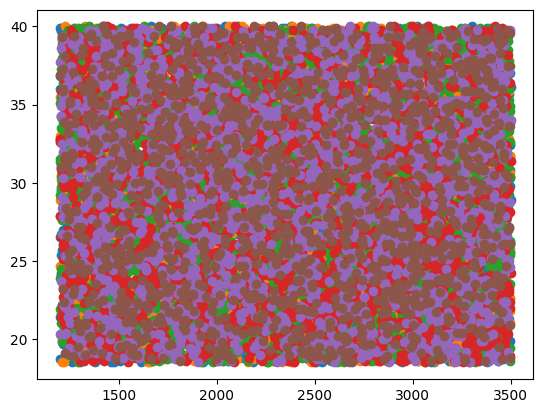

In [39]:
# Found no significant statistical correlation between Calorie Intake and BMI(split cells to see individually)

vegetarian_youngs = young_adults[young_adults["Diet_Type"] == "Vegetarian"]
plt.scatter(vegetarian_youngs["Daily_Calorie_Intake"], vegetarian_youngs["BMI"])

meat_youngs = young_adults[young_adults["Diet_Type"] == "Non-Vegetarian"]
plt.scatter(meat_youngs["Daily_Calorie_Intake"], meat_youngs["BMI"])



vegetarian_mid = middle_aged[middle_aged["Diet_Type"] == "Vegetarian"]
plt.scatter(vegetarian_mid["Daily_Calorie_Intake"], vegetarian_mid["BMI"])

meat_mid = middle_aged[middle_aged["Diet_Type"] == "Non-Vegetarian"]
plt.scatter(meat_mid["Daily_Calorie_Intake"], meat_mid["BMI"])

veg_old = elderly[elderly["Diet_Type"] == "Vegetarian"]
plt.scatter(veg_old["Daily_Calorie_Intake"], veg_old["BMI"])

meat_old = elderly[elderly["Diet_Type"] == "Non-Vegetarian"]
plt.scatter(meat_old["Daily_Calorie_Intake"], meat_old["BMI"])

In [108]:
def difference_t_test(X, Y):
    sum_variances = (pow(X.std(), 2)/len(X)) + (pow(Y.std(), 2) / len(Y))
    final_std = math.sqrt(sum_variances)
    if X.mean() > Y.mean():
        difference = X.mean() - Y.mean()
    else:
        difference = Y.mean() - X.mean()
    z_stat = difference/final_std
    p_val = 2*(1 - norm.cdf(z_stat))
    if p_val < 0.1:
        return True, p_val
    return False, p_val


In [112]:
print("Vegetarian Youngs' BMI and Health Score")
print(vegetarian_youngs["BMI"].mean())
print(vegetarian_youngs["Health_Score"].mean())
print("Non-Veg Youngs' BMI and Health Score")
print(meat_youngs["BMI"].mean())
print(meat_youngs["Health_Score"].mean())

# The Health Scores are so varied that it doesn't tell us anything.
print(difference_t_test(meat_youngs["Health_Score"], vegetarian_youngs["Health_Score"]))
print(difference_t_test(meat_youngs["BMI"], vegetarian_youngs["BMI"]))

Vegetarian Youngs' BMI and Health Score
29.315799803729146
50.04121687929342
Non-Veg Youngs' BMI and Health Score
29.260468902637577
50.54737870400521
(False, 0.4574503319750338)
(False, 0.7090875878562266)


In [114]:
print("Vegetarian Middle-Aged BMI and Health Score")
print(vegetarian_mid["BMI"].mean())
print(vegetarian_mid["Health_Score"].mean())
print("Non-Vegetarian Middle-Aged BMI and Health Score")
print(meat_mid["BMI"].mean())
print(meat_mid["Health_Score"].mean())

print(difference_t_test(vegetarian_mid["Health_Score"], meat_mid["Health_Score"]))
print(difference_t_test(vegetarian_mid["BMI"], meat_mid["BMI"])) 
# Finding: amongst middle-aged people, vegetarians have a significantly higher BMI than non-vegetarians

Vegetarian Middle-Aged BMI and Health Score
29.315873878771406
51.235390051644465
Non-Vegetarian Middle-Aged BMI and Health Score
29.01426005747127
50.57147988505747
(False, 0.361163142861717)
(True, 0.052400366709857815)


In [115]:
print("Vegetarian Elderly BMI and Health Score")
print(veg_old["BMI"].mean())
print(veg_old["Health_Score"].mean())
print("Non-Vegetarian Elderly BMI and Health Score")
print(meat_old["BMI"].mean())
print(meat_old["Health_Score"].mean())

print(difference_t_test(veg_old["Health_Score"], meat_old["Health_Score"]))
print(difference_t_test(veg_old["BMI"], meat_old["BMI"])) 

Vegetarian Elderly BMI and Health Score
29.398665955176092
51.21398078975454
Non-Vegetarian Elderly BMI and Health Score
29.622972972972974
50.28228228228228
(False, 0.3647911422168004)
(False, 0.3087732176982505)


In [96]:
# Try and find relations with Spice
def convert_spice(X):
    if X == "Low":
        return 0
    elif X == "Medium":
        return 1
    else:
        return 2
df["Spice_Level"] = df["Spice_Level"].apply(convert_spice)

In [117]:
print("BMI, in descending spice level")
print(df[df["Spice_Level"] == 2]["BMI"].mean())
print(df[df["Spice_Level"] == 1]["BMI"].mean())
print(df[df["Spice_Level"] == 0]["BMI"].mean())
print("Health Score in descending spice level")
print(df[df["Spice_Level"] == 2]["Health_Score"].mean())
print(df[df["Spice_Level"] == 1]["Health_Score"].mean())
print(df[df["Spice_Level"] == 0]["Health_Score"].mean())

print(difference_t_test(df[df["Spice_Level"] == 2]["Health_Score"], df[df["Spice_Level"] == 1]["Health_Score"]))
print(difference_t_test(df[df["Spice_Level"] == 1]["Health_Score"], df[df["Spice_Level"] == 0]["Health_Score"]))
print(difference_t_test(df[df["Spice_Level"] == 2]["Health_Score"], df[df["Spice_Level"] == 0]["Health_Score"]))

#Finding: a higher amount of spice has a statistically significant decrease in health_score; but only by a bit.

BMI, in descending spice level
29.294917887261434
29.30352417883212
29.218336355394378
Health Score in descending spice level
50.0774522858411
50.76334397810219
51.25430643699003
(False, 0.1923862992792449)
(False, 0.3542194891010566)
(True, 0.052255229350430366)


In [78]:
#Now, I will try and compare the different cuisines.
print(df["Common_Diseases"].describe())
df.groupby("Primary_Cuisine")["Health_Score"].mean()
df.groupby("Primary_Cuisine")["BMI"].mean()

count         7037
unique           4
top       Diabetes
freq          2639
Name: Common_Diseases, dtype: object


Primary_Cuisine
Bengali          29.274019
Gujarati         29.276029
Maharashtrian    29.188087
North Indian     29.316686
Punjabi          29.260749
Rajasthani       29.509903
South Indian     29.133126
Name: BMI, dtype: float64

In [129]:
def count_diseases(X):
    a = len(X[~X["Common_Diseases"].isnull()])
    b = len(X["Common_Diseases"])
    return  a / b
def pooled_variance(X, Y):
    var_x = pow(X.std(), 2)
    var_y = pow(Y.std(), 2)
    return math.sqrt(var_x + var_y)

def anova_test(centers, variances, total_n):
    var_between = statistics.variance(centers)
    var_within = sum(variances)/len(variances)
    f_stat = var_between / var_within
    df1 = len(centers) - 1
    df2 = total_n - len(centers)
    p = f.cdf(f_stat, df1, df2)
    if p < 0.05:
        return True, p
    return False, p
    

count_diseases(df)


0.39788533303177653

In [131]:
bengali = df[df["Primary_Cuisine"] == "Bengali"]
gujarati = df[df["Primary_Cuisine"] == "Gujarati"]
maha = df[df["Primary_Cuisine"] == "Maharashtrian"]
north = df[df["Primary_Cuisine"] == "North Indian"]
punjabi = df[df["Primary_Cuisine"] == "Punjabi"]
rajasthani = df[df["Primary_Cuisine"] == "Rajasthani"]
south = df[df["Primary_Cuisine"] == "South Indian"]

diets = [bengali, gujarati, maha, north, punjabi, rajasthani, south]
centers = []
variances = []
n = 0
for d in diets:
    p = count_diseases(d)
    var = (p*(1-p))/len(d)
    centers.append(p)
    variances.append(var)
    n += len(d)
    print(f"Proportion of diseases within this diet: {p}. Standard Error of proportion: {math.sqrt(var)} ")

anova_test(centers, variances, n)
# It seems there is no statistically significant difference in the proportion of diseases within each diet.

Proportion of diseases within this diet: 0.3963170536429143. Standard Error of proportion: 0.009786549948874063 
Proportion of diseases within this diet: 0.4035512510088781. Standard Error of proportion: 0.009855649814188114 
Proportion of diseases within this diet: 0.39644970414201186. Standard Error of proportion: 0.009715424939066554 
Proportion of diseases within this diet: 0.41046831955922863. Standard Error of proportion: 0.00975867968932315 
Proportion of diseases within this diet: 0.37278582930756843. Standard Error of proportion: 0.00970201256523807 
Proportion of diseases within this diet: 0.4124271844660194. Standard Error of proportion: 0.009700985876822582 
Proportion of diseases within this diet: 0.392621359223301. Standard Error of proportion: 0.009623390345896534 


(False, 0.9183557084700481)